In [10]:
from autots import AutoTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading data
data = pd.read_csv("data/Foreign_Exchange_Rates.xls")
data.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$,Unnamed: 24
0,0,03-01-2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97,NaN
1,1,04-01-2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13,NaN
2,2,05-01-2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1,NaN
3,3,06-01-2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62,NaN
4,4,07-01-2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3,NaN


In [ ]:
# dropping null values and converting timeseries to datetime 
data.dropna()
data['Time Serie'] = pd.to_datetime(data['Time Serie'], format='%d-%m-%Y')

In [13]:
# Pre-Processing 
# date conversion already done, null values already dropped 
data.isnull().sum()
print("\n Duplicates:",data.duplicated().sum())
 
data = data.drop("Unnamed: 0", axis = 1) # remove index column 
data = data.drop("Unnamed: 24", axis = 1) # remove final column with 0 distinct values
data = data.replace("ND", np.nan) # replace NDs with NaN values

reformat = data.drop("Time Serie", axis = 1)
time_series = data[["Time Serie"]].iloc[1:]
reformat_ = reformat.iloc[1:].astype(float) # reformat currencies as floats
reformat_ = reformat_.fillna(reformat_.mean()) # replace NaN values with means

reformat_.insert(0, "Time Serie", time_series.values) 
data_cleaned = reformat_.copy()
data_cleaned = data_cleaned.set_index("Time Serie") #set Time Serie as the index

print(data_cleaned.head())
print(data_cleaned.info())

# no encoding required



 Duplicates: 0
            AUSTRALIA - AUSTRALIAN DOLLAR/US$  EURO AREA - EURO/US$  \
Time Serie                                                            
2000-01-04                             1.5239                0.9700   
2000-01-05                             1.5267                0.9676   
2000-01-06                             1.5291                0.9686   
2000-01-07                             1.5272                0.9714   
2000-01-10                             1.5242                0.9754   

            NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
Time Serie                                        
2000-01-04                               1.9238   
2000-01-05                               1.9339   
2000-01-06                               1.9436   
2000-01-07                               1.9380   
2000-01-10                               1.9350   

            UNITED KINGDOM - UNITED KINGDOM POUND/US$  BRAZIL - REAL/US$  \
Time Serie                                          

In [ ]:
# EDA 
# univariate analysis
print(data_cleaned.describe()) # counts are all consistent; ranges, mean, max and min are reasonable

       AUSTRALIA - AUSTRALIAN DOLLAR/US$  EURO AREA - EURO/US$  \
count                        5216.000000           5216.000000   
mean                            1.331979              0.843876   
std                             0.264758              0.124402   
min                             0.906900              0.624600   
25%                             1.120950              0.752975   
50%                             1.316300              0.822800   
75%                             1.424150              0.897300   
max                             2.071300              1.209200   

       NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
count                          5216.000000   
mean                              1.543612   
std                               0.330848   
min                               1.134600   
25%                               1.330000   
50%                               1.450300   
75%                               1.580850   
max                               2.5

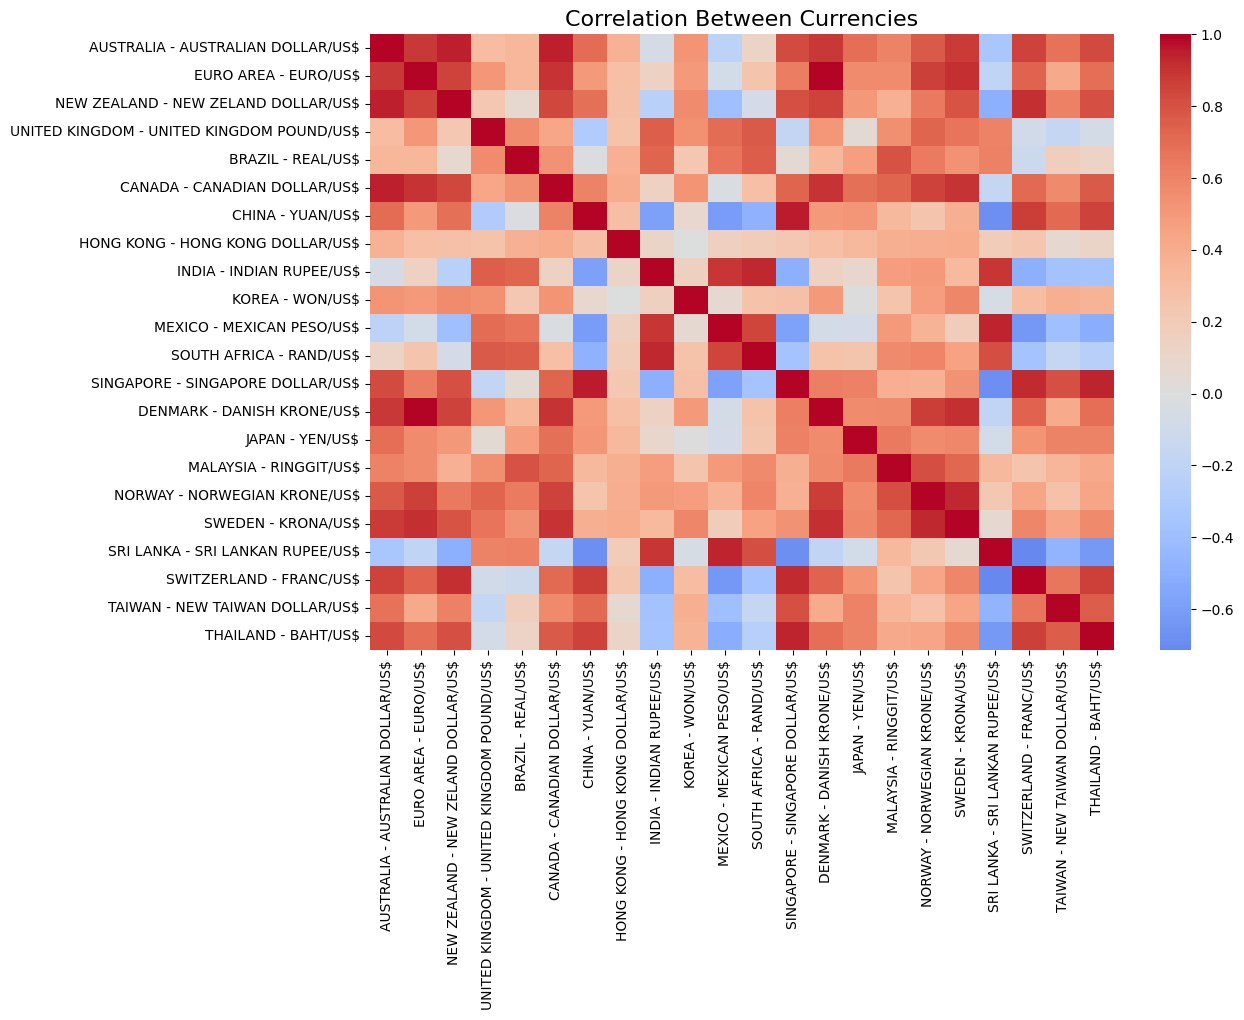

In [ ]:
# Multivariate analysis - correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Between Currencies", fontsize=16)

plt.show()

The strongest bivariate correlations can be observed between: Euros and Danish Krona, Australian Dollars and Canadian Dollars, Singapore Dollars and Chinese Yuan.

The strongest multivariate correlations can be observed between: Euros, US Dollars and New Zealand Dollars.

Hong Kong Dollars don't appear to strongly correlate with any other currency and Korean Won, though not to the same degree as Hong Kong Dollars.

Mexican Pesos, Indian Rupees and Sri Lankan Rupees appear to be significantly correlated with each other whilst all being negatively correlated with the majority of other currencies.

Many more conclusions can be made from this heatmap...

In [ ]:
# First Test Model - ...
# Scaling and train-test split

In [ ]:
#selecting currency

options = {
    'AUSTRALIAN DOLLAR': 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
    'EURO': 'EURO AREA - EURO/US$',
    'NEW ZEALAND DOLLAR': 'NEW ZEALAND - NEW ZEALAND DOLLAR/US$',
    'GREAT BRITAIN POUNDS': 'UNITED KINGDOM - UNITED KINGDOM POUND/US$',
    'BRAZILIAN REAL': 'BRAZIL - REAL/US$',
    'CANADIAN DOLLAR': 'CANADA - CANADIAN DOLLAR/US$',
    'CHINESE YUAN$': 'CHINA - YUAN/US$',
    'HONG KONG DOLLAR': 'HONG KONG - HONG KONG DOLLAR/US$',
    'INDIAN RUPEE': 'INDIA - INDIAN RUPEE/US$',
    'KOREAN WON$': 'KOREA - WON/US$',
    'MEXICAN PESO': 'MEXICO - MEXICAN PESO/US$',
    'SOUTH AFRICAN RAND$': 'SOUTH AFRICA - RAND/US$',
    'SINGAPORE DOLLAR': 'SINGAPORE - SINGAPORE DOLLAR/US$',
    'DANISH KRONE': 'DENMARK - DANISH KRONE/US$',
    'JAPANESE YEN$': 'JAPAN - YEN/US$',
    'MALAYSIAN RINGGIT': 'MALAYSIA - RINGGIT/US$',
    'NORWEGIAN KRONE': 'NORWAY - NORWEGIAN KRONE/US$',
    'SWEDEN KRONA': 'SWEDEN - KRONA/US$',
    'SRILANKAN RUPEE': 'SRI LANKA - SRI LANKAN RUPEE/US$',
    'SWISS FRANC': 'SWITZERLAND - FRANC/US$',
    'NEW TAIWAN DOLLAR': 'TAIWAN - NEW TAIWAN DOLLAR/US$',
    'THAI BAHT': 'THAILAND - BAHT/US$'
}

selected_option = 'SRILANKAN RUPEE' #select currency here to train model

In [ ]:
#predictive modelling code here

# we are using autots library for predictive modelling as an example. Please compare different models(Traditional ML, DeepLearning or Transformers) and select the bestmodel.
forecast=10 #no of days for forecasting

model = AutoTS(forecast_length=int(forecast), frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(data, date_col = 'Time Serie', value_col=options[selected_option], id_col=None)

Using 2 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Categorical features converted to numeric
Model Number: 1 with model AverageValueNaive in generation 0 of 25
Model Number: 2 with model AverageValueNaive in generation 0 of 25
Model Number: 3 with model AverageValueNaive in generation 0 of 25
Model Number: 4 with model DatepartRegression in generation 0 of 25


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\autots\tools\shaping.py:256: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore', downcast=self.downcast)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 5 with model DatepartRegression in generation 0 of 25
Model Number: 6 with model DatepartRegression in generation 0 of 25


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 25



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.3536
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3368 
Epoch 3/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5256

In [ ]:
#generating forecasts
prediction = model.predict()
forecast = prediction.forecast

/home/furkhan67/anaconda3/envs/dsenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/furkhan67/anaconda3/envs/dsenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
forecast

,SRI LANKA - SRI LANKAN RUPEE/US$
2020-01-01,177.35
2020-01-02,176.65
2020-01-03,176.55
2020-01-06,176.8
2020-01-07,176.65
2020-01-08,176.55
2020-01-09,176.66
2020-01-10,176.55
2020-01-13,176.75
2020-01-14,176.66
